In [200]:
!pip install pandas_datareader

     |████████████████████████████████| 112kB 2.0MB/s eta 0:00:01


In [211]:
import matplotlib.pyplot as plt
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

%matplotlib inline

In [126]:
imp_2018 = pd.read_excel('./data/dataweb-queryExport (2).xlsx', sheet_name="General Customs Value", header=2)
imp_2017= pd.read_excel('./data/dataweb-queryExport (3).xlsx', sheet_name="General Customs Value", header=2)
imp_2016= pd.read_excel('./data/dataweb-queryExport (4).xlsx', sheet_name="General Customs Value", header=2 )
imp_2015= pd.read_excel('./data/dataweb-queryExport (5).xlsx', sheet_name="General Customs Value", header=2)
imp_2014= pd.read_excel('./data/dataweb-queryExport (6).xlsx', sheet_name="General Customs Value", header=2)
imp_2013= pd.read_excel('./data/dataweb-queryExport (7).xlsx', sheet_name="General Customs Value", header=2)
imp_2012= pd.read_excel('./data/dataweb-queryExport (8).xlsx', sheet_name="General Customs Value", header=2)
imp_2011= pd.read_excel('./data/dataweb-queryExport (9).xlsx', sheet_name="General Customs Value", header=2)
imp_2010= pd.read_excel('./data/dataweb-queryExport (10).xlsx', sheet_name="General Customs Value", header=2)

In [127]:
imp_all = (imp_2018, imp_2017, imp_2016, imp_2015, imp_2014, imp_2013, imp_2012, imp_2011, imp_2010)

In [134]:
for imp in imp_all:
    imp.columns = ['Data Type', 'Country', 'GCV']
    imp['Year'] = 2018

In [137]:
imp_2017['Year'] = 2017
imp_2016['Year'] = 2016
imp_2015['Year'] = 2015
imp_2014['Year'] = 2014
imp_2013['Year'] = 2013
imp_2012['Year'] = 2012
imp_2011['Year'] = 2011
imp_2010['Year'] = 2010

In [149]:
imp_pd = imp_2018

In [159]:
imp_pd.shape

(234, 4)

In [160]:
for imp in imp_all:
    imp_pd = imp_pd.append(imp)

In [ ]:
imp_pd.reset_index()
imp_pd.drop('index', axis=1, inplace=True)

In [181]:
imp_pd.head()

,Data Type,Country,GCV,Year
0,General Customs Value,Afghanistan,28589448,2018
1,General Customs Value,Albania,68001954,2018
2,General Customs Value,Algeria,4618353159,2018
3,General Customs Value,Andorra,16016849,2018
4,General Customs Value,Angola,2698475968,2018


In [182]:
imp_pd = imp_pd[imp_pd["Data Type"] != "Total:"]

In [183]:
imp_pd.head()

,Data Type,Country,GCV,Year
0,General Customs Value,Afghanistan,28589448,2018
1,General Customs Value,Albania,68001954,2018
2,General Customs Value,Algeria,4618353159,2018
3,General Customs Value,Andorra,16016849,2018
4,General Customs Value,Angola,2698475968,2018


In [190]:
imp_pd.sort_values('GCV').tail(200)

,Data Type,Country,GCV,Year
175,General Customs Value,Saudi Arabia,22083194415,2015
103,General Customs Value,Israel,22131110384,2012
102,General Customs Value,Israel,22203058707,2016
147,General Customs Value,Netherlands,22259597393,2012
204,General Customs Value,Thailand,22693580280,2010
...,...,...,...,...
42,General Customs Value,China,468474894856,2014
42,General Customs Value,China,483201655364,2015
42,General Customs Value,China,505220233332,2017
42,General Customs Value,China,539675590832,2018


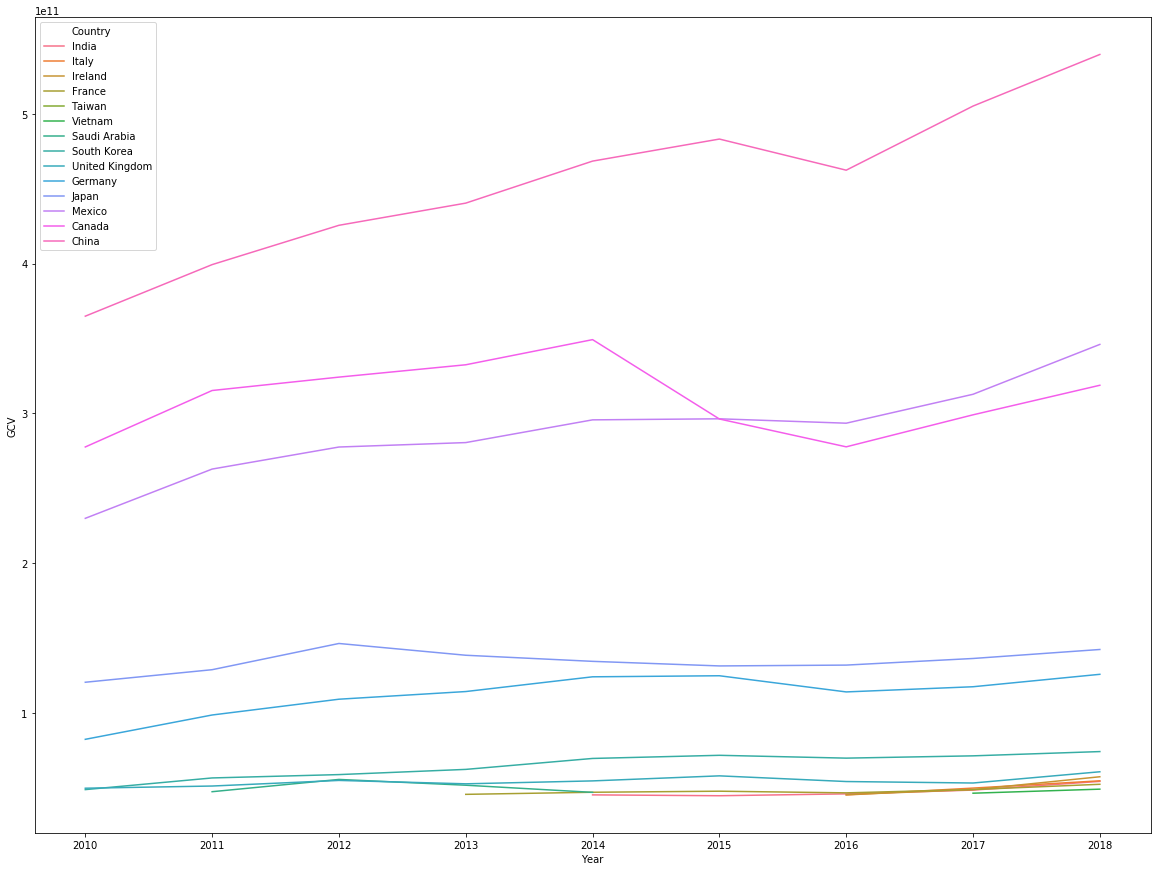

In [197]:
plt.figure(figsize=(20,15))
sns.color_palette("Paired")
sns.lineplot(data=imp_pd.sort_values('GCV').tail(100), x='Year', y='GCV', hue='Country')

In [203]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-06-15')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-09,345.609985,332.010010,332.140015,343.989990,36928100.0,343.989990
2020-06-10,354.769989,346.089996,347.899994,352.839996,41662900.0,352.839996
2020-06-11,351.059998,335.480011,349.309998,335.899994,50415600.0,335.899994
2020-06-12,347.799988,334.220001,344.720001,338.799988,50001500.0,338.799988
2020-06-15,345.679993,332.579987,333.250000,342.989990,34642900.0,342.989990


In [204]:
df.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
1,2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2,2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
3,2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
4,2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...,...
2121,2020-06-09,345.609985,332.010010,332.140015,343.989990,36928100.0,343.989990
2122,2020-06-10,354.769989,346.089996,347.899994,352.839996,41662900.0,352.839996
2123,2020-06-11,351.059998,335.480011,349.309998,335.899994,50415600.0,335.899994
2124,2020-06-12,347.799988,334.220001,344.720001,338.799988,50001500.0,338.799988


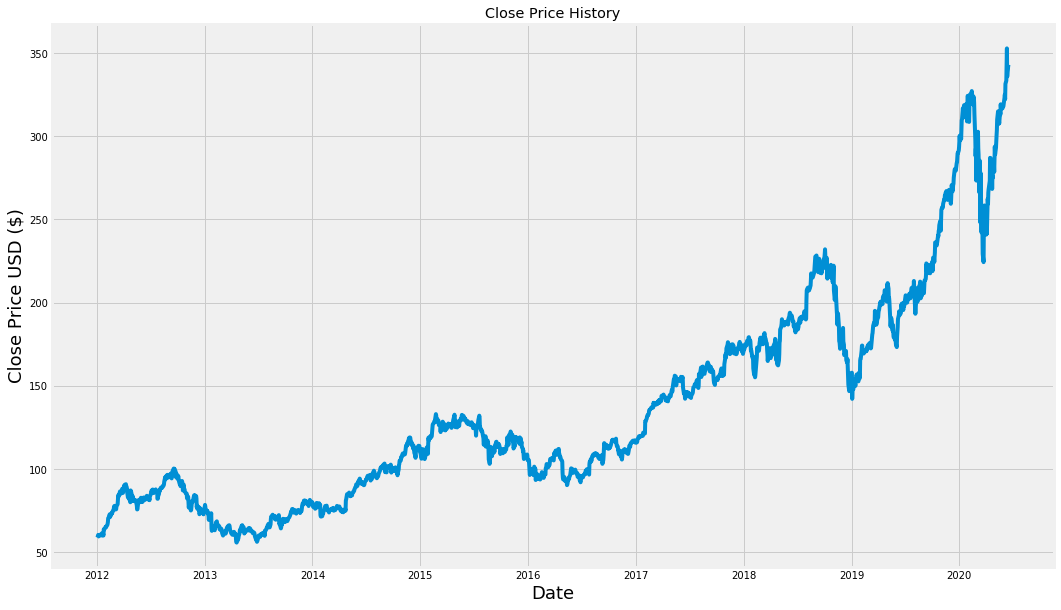

In [210]:
plt.figure(figsize=(16,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [212]:
# create training set
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

print(training_data_len)

1701


In [213]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00995503],
       [0.01101787],
       [0.01322528],
       ...,
       [0.94297255],
       [0.9527352 ],
       [0.96684058]])

In [215]:
# Create training dataset
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(X_train)
        print(y_train)
        print()

[array([0.00995503, 0.01101787, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408132, 0.01643302,
       0.01855388, 0.01789982, 0.01431697, 0.01773631, 0.01436987,
       0.02699401, 0.02601774, 0.02729218, 0.03004785, 0.03171663,
       0.03157717, 0.03106259, 0.03325558, 0.03531872, 0.037656  ,
       0.04143122, 0.04936158, 0.04948181, 0.05389666, 0.05719575,
       0.0515257 , 0.05370909, 0.05366581, 0.05978792, 0.05891744,
       0.06052852, 0.06342365, 0.06503475, 0.06967562, 0.07305649,
       0.07403274, 0.07437421, 0.06859356, 0.06719888, 0.06740568,
       0.07284006, 0.0743694 , 0.07765406, 0.08539688, 0.09572703,
       0.09379373, 0.09379853, 0.10126722, 0.10360448, 0.1019405 ,
       0.10042081, 0.09883858, 0.10409502, 0.10770193, 0.10921202])]
[0.10548007307678448]

[array([0.00995503, 0.01101787, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408132, 0.01643302,
       0.01855388, 0.01789982, 0.01

In [216]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [218]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1641, 60, 1)

In [220]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [221]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [222]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1641/1641 [==============================] - 99s 60ms/step - loss: 8.3876e-04


In [223]:
# create test data set
test_data = scaled_data[training_data_len - 60: , :]
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    

In [224]:
# Convert 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [225]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [226]:
#RMSE
rmse = np.sqrt( np.mean(predictions-y_test)**2)
rmse 

0.4643529914407169

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


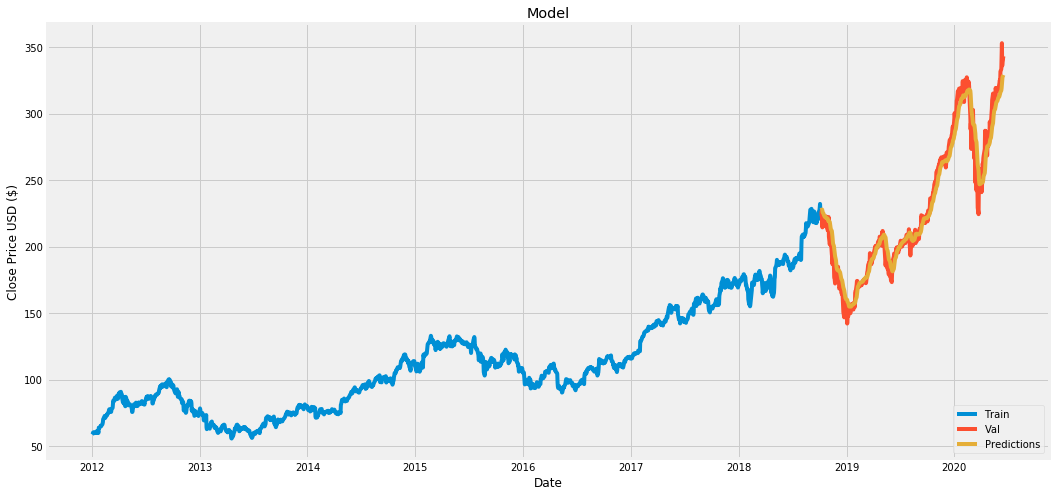

In [230]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()